In [1]:
import getpass
import os
import numpy as np
import sys
import matplotlib.pyplot as plt
os.environ['OMP_NUM_THREADS'] = '1' # to avoid using too many CPUs

if getpass.getuser() == "grasser": # when running from LEM
    os.environ['pRT_input_data_path'] ="/net/lem/data2/pRT_input_data"
    from mpi4py import MPI 
    comm = MPI.COMM_WORLD # important for MPI
    rank = comm.Get_rank() # important for MPI
    import matplotlib
    matplotlib.use('Agg') # disable interactive plotting
    from LIFE_retrieval.target import Target
    from LIFE_retrieval.retrieval import Retrieval
    from LIFE_retrieval.parameters import Parameters
elif getpass.getuser() == "natalie": # when testing from my laptop
    os.environ['pRT_input_data_path'] = "/home/natalie/.local/lib/python3.8/site-packages/petitRADTRANS/input_data_std/input_data"
    from target import Target
    from retrieval import Retrieval
    from parameters import Parameters

target_object = 'Sorg1'
Nlive=200 # number of live points (integer)
evtol=0.5 # evidence tolerance (float)
bayes=False

def init_retrieval(obj,Nlive,evtol,PT_type='PTknot',chem='const'):

    output=f'{obj}_N{Nlive}_e{evtol}' # output folder name
    obj = Target(obj)

    constant_params={'rv':0,
                     'log_opa_base_gray': -10,  
                    'log_P_base_gray': 3, # pressure of gray cloud deck
                    'fsed_gray': 20} # add if needed
    
    free_params = {#'rv': ([0,20],r'$v_{\rm rad}$'),
                'log_g':([1,3],r'log $g$')}
    
    if PT_type=='PTknot':
        pt_params={'T0' : ([100,1000], r'$T_0$'), # bottom of the atmosphere (hotter)
                'T1' : ([0,1000], r'$T_1$'),
                'T2' : ([0,1000], r'$T_2$'),
                'T3' : ([0,1000], r'$T_3$'),
                'T4' : ([0,1000], r'$T_4$'),
                'T5' : ([0,1000], r'$T_5$'),
                'T6' : ([0,1000], r'$T_6$')} # top of atmosphere (cooler)
        free_params.update(pt_params)

    if PT_type=='PTgrad':
        pt_params={'dlnT_dlnP_0': ([-0.4,0.4], r'$\nabla T_0$'), # gradient at T0 
                'dlnT_dlnP_1': ([-0.4,0.4], r'$\nabla T_1$'), 
                'dlnT_dlnP_2': ([-0.4,0.4], r'$\nabla T_2$'), 
                'dlnT_dlnP_3': ([-0.4,0.4], r'$\nabla T_3$'), 
                'dlnT_dlnP_4': ([-0.4,0.4], r'$\nabla T_4$'), 
                'T0': ([100,1000], r'$T_0$')} # at bottom of atmosphere
        free_params.update(pt_params)
        
    # free chemistry, define VMRs
    chemistry={'log_H2O':([-12,-1],r'log H$_2$O'),
                'log_CO':([-12,-1],r'log CO'),
                'log_CO2':([-12,-1],r'log CO$_2$'),
                'log_CH4':([-12,-1],r'log CH$_4$'),
                'log_NH3':([-12,-3],r'log NH$_3$'),
                'log_HCN':([-12,-3],r'log HCN'),
                'log_H2S':([-12,-3],r'log H$_2$S'),
                'log_C2H2':([-12,-3],r'log C$_2$H$_2$'),
                'log_C2H4':([-12,-3],r'log C$_2$H$_4$'),
                'log_C2H6':([-12,-3],r'log C$_2$H$_6$'),
                'log_CH3Cl':([-12,-3],r'log CH$_3$Cl'),
                'log_SO2':([-12,-3],r'log SO$_2$'),
                'log_OCS':([-12,-3],r'log OCS'),
                'log_CS2':([-12,-3],r'log CS$_2$'),
                'log_DMS':([-12,-3],r'log DMS')}
       
    if chem=='var':
        varchem={}
        for key in chemistry.keys():
            varchem[f'{key}_0']=chemistry[key]
            varchem[f'{key}_1']=chemistry[key]
            varchem[f'{key}_2']=chemistry[key]
        chemistry=varchem

    #cloud_props={'log_opa_base_gray': ([-10,3], r'log $\kappa_{\mathrm{cl},0}$'),  
                #'log_P_base_gray': ([-6,3], r'log $P_{\mathrm{cl},0}$'), # pressure of gray cloud deck
                #'fsed_gray': ([0,20], r'$f_\mathrm{sed}$')} # sedimentation parameter for particles
    
    #free_params.update(cloud_props)
    free_params.update(chemistry)
    parameters = Parameters(free_params, constant_params)
    cube = np.random.rand(parameters.n_params)
    parameters(cube)
    retrieval=Retrieval(target=obj,parameters=parameters,output_name=output,
                        N_live_points=Nlive,evidence_tolerance=evtol,PT_type=PT_type,chem=chem)

    return retrieval

retrieval=init_retrieval(target_object,Nlive,evtol,PT_type='PTknot',chem='var')
#retrieval.PMN_lnL()
#retrieval.run_retrieval(bayes=bayes)
#retrieval.evaluate(makefigs=False)


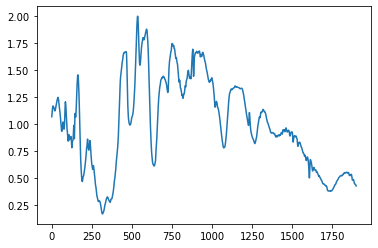

In [2]:
from pRT_model import pRT_spectrum
import matplotlib.pyplot as plt
model_object=pRT_spectrum(retrieval)
model_flux=model_object.make_spectrum()
plt.plot(model_flux)

In [ ]:
retrieval.run_retrieval()


 ------ Sorg1 - Nlive: 200 - ev: 0.5 ------- 


 ----------------- Starting main retrieval. ----------------- 



In [2]:
from pRT_model import pRT_spectrum
import matplotlib.pyplot as plt
model_object=pRT_spectrum(retrieval)
model_flux=model_object.make_spectrum()
plt.plot(model_flux)

KeyError: 'OH'

In [3]:
layers = np.empty(50)
for l in range(50):
    mf=0
    for key in model_object.mass_fractions.keys():
        if key!='MMW':
            #print(key,model_object.mass_fractions[key][l])
            mf+=model_object.mass_fractions[key][l]
    layers[l]=mf
layers

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [7]:
model_object.CO

16.754565678940192

In [12]:
model_object.mass_fractions

{'CO_12_HITEMP': array([4.49206805e-08, 4.08229964e-08, 3.70991048e-08, 3.37149083e-08,
        3.06394196e-08, 2.78444784e-08, 2.53044929e-08, 2.29962060e-08,
        2.08984820e-08, 1.89921134e-08, 1.72596445e-08, 1.56852122e-08,
        1.42544003e-08, 1.29541077e-08, 1.17724283e-08, 1.06985422e-08,
        9.72261655e-09, 8.83571522e-09, 8.02971742e-09, 7.29724308e-09,
        6.63158538e-09, 6.02664927e-09, 5.47689569e-09, 4.97729087e-09,
        4.52326022e-09, 4.45758764e-09, 4.76362948e-09, 5.09068304e-09,
        5.44019091e-09, 5.81369473e-09, 6.21284198e-09, 6.63939322e-09,
        7.09522993e-09, 7.58236274e-09, 8.10294033e-09, 8.65925888e-09,
        9.25377226e-09, 9.88910277e-09, 1.05680528e-08, 1.12936170e-08,
        1.20689959e-08, 1.28976095e-08, 1.37831127e-08, 1.47294113e-08,
        1.57406794e-08, 1.68213775e-08, 1.79762724e-08, 1.92104582e-08,
        2.05293787e-08, 2.19388516e-08]),
 'H2O_Exomol': array([5.71929601e-02, 2.70785791e-02, 1.28206242e-02, 6.070052

In [ ]:
np.ones()

In [ ]:
retrieval.run_retrieval()


 ------ Sorg1 - Nlive: 200 - ev: 0.5 ------- 


 ----------------- Starting main retrieval. ----------------- 

Invalid mass fractions
Invalid mass fractions
Invalid mass fractions
Invalid mass fractions
Invalid mass fractions
Invalid mass fractions
Invalid mass fractions
Invalid mass fractions
Invalid mass fractions


Exception ignored on calling ctypes callback function: <function run.<locals>.loglike at 0x7fe53f016a60>
Traceback (most recent call last):
  File "/home/natalie/.local/lib/python3.8/site-packages/pymultinest/run.py", line 228, in loglike
    return LogLikelihood(cube, ndim, nparams)
  File "/home/natalie/Desktop/files/uni/PhD/LIFE/LIFE_retrieval/LIFE_retrieval/retrieval.py", line 105, in PMN_lnL
    self.model_flux=self.model_object.make_spectrum()
  File "/home/natalie/Desktop/files/uni/PhD/LIFE/LIFE_retrieval/LIFE_retrieval/pRT_model.py", line 229, in make_spectrum
    
  File "/home/natalie/.local/lib/python3.8/site-packages/petitRADTRANS/radtrans.py", line 1378, in calc_flux
    self.calc_RT(contribution)
  File "/home/natalie/.local/lib/python3.8/site-packages/petitRADTRANS/radtrans.py", line 1117, in calc_RT
    self.flux, self.contr_em = fs.flux_ck(self.freq,
KeyboardInterrupt: 


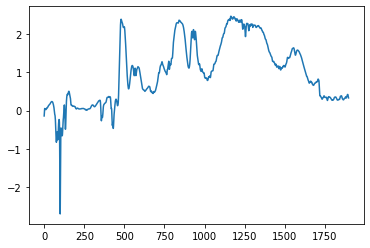

In [4]:
from pRT_model import pRT_spectrum
import matplotlib.pyplot as plt
model_object=pRT_spectrum(retrieval)
model_flux=model_object.make_spectrum()
plt.plot(model_flux)

array([2.61810656, 2.70035824, 2.78519398, 2.87269496, 2.96294491,
       3.0560302 , 3.1520399 , 3.25106588, 3.35320291, 3.45854873,
       3.56720415, 3.67927313, 3.79486292, 3.91408414, 4.03705087,
       4.16388079, 4.29469525, 4.42961944, 4.56878247, 4.71231751,
       4.86036192, 5.01305736, 5.17054996, 5.33299042, 5.50053418,
       5.5140467 , 5.37238985, 5.23437219, 5.09990023, 4.96888287,
       4.84123138, 4.71685927, 4.59568231, 4.47761841, 4.36258759,
       4.25051193, 4.14131551, 4.03492437, 3.93126644, 3.8302715 ,
       3.73187113, 3.63599869, 3.54258923, 3.45157948, 3.36290778,
       3.27651408, 3.19233984, 3.11032806, 3.03042317, 2.95257105])

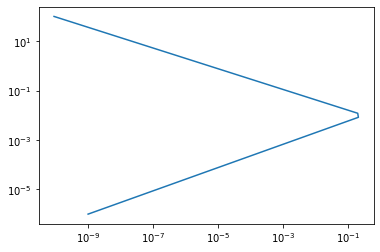

In [5]:
plt.plot(model_object.mass_fractions['DMS'],model_object.pressure)
plt.yscale('log')
plt.xscale('log')
model_object.mass_fractions['MMW']

In [13]:
model_object.mass_fractions

{'CO_12_HITEMP': array([3.95674282e-11, 3.46815027e-06, 6.93626098e-06, 1.04043717e-05,
        1.38724824e-05, 1.73405931e-05, 2.08087038e-05, 2.42768145e-05,
        2.77449252e-05, 3.12130359e-05, 3.46811466e-05, 3.81492573e-05,
        4.16173680e-05, 4.50854787e-05, 4.85535894e-05, 5.20217001e-05,
        5.54898108e-05, 5.89579215e-05, 6.24260322e-05, 6.58941429e-05,
        6.93622536e-05, 7.28303643e-05, 7.62984751e-05, 7.97665858e-05,
        8.32346965e-05, 8.32387533e-05, 7.97787562e-05, 7.63187592e-05,
        7.28587621e-05, 6.93987650e-05, 6.59387680e-05, 6.24787709e-05,
        5.90187739e-05, 5.55587768e-05, 5.20987798e-05, 4.86387827e-05,
        4.51787856e-05, 4.17187886e-05, 3.82587915e-05, 3.47987945e-05,
        3.13387974e-05, 2.78788003e-05, 2.44188033e-05, 2.09588062e-05,
        1.74988092e-05, 1.40388121e-05, 1.05788150e-05, 7.11881799e-06,
        3.65882093e-06, 1.98823869e-07]),
 'H2O_Exomol': array([1.53409339e-02, 1.47147733e-02, 1.40886127e-02, 1.346245

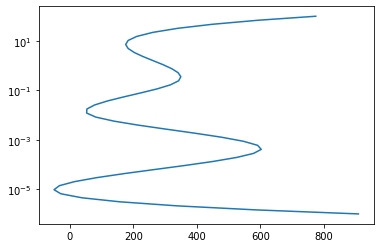

In [6]:
plt.plot(model_object.temperature,model_object.pressure)
plt.yscale('log')

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# weird format???
filename='psg_rad_Sorg1X.txt'
file1=np.genfromtxt(filename,skip_header=13,skip_footer=1488,delimiter='  ')
wl1=file1[:,0]
fl1=file1[:,1]
flerr1=np.ones_like(fl1)*1e-5
file2=np.genfromtxt(filename,skip_header=424,delimiter='  ')
wl2=file2[:,0]
fl2=file2[:,1]
flerr2=file2[:,2]
wl=np.append(wl1,wl2)
fl=np.append(fl1,fl2)
fl/=np.median(fl)
flerr=np.append(flerr1,flerr2)


/home/natalie/.local/lib/python3.8/site-packages/petitRADTRANS/radtrans.py:119: FutureWarning: pRT_input_data_path was set by an environment variable. In a future update, the path to the petitRADTRANS input_data will be set within a .ini file that will be automatically generated into the user home directory (OS agnostic), inside a .petitradtrans directory
  warnings.warn(f"pRT_input_data_path was set by an environment variable. In a future update, the path to "



  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...
Done.



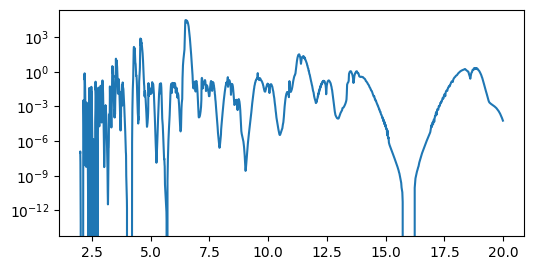

In [1]:
import os
import numpy as np
os.environ['pRT_input_data_path'] = "/home/natalie/.local/lib/python3.8/site-packages/petitRADTRANS/input_data_std/input_data"
from petitRADTRANS import Radtrans
import matplotlib.pyplot as plt

wlen_range=np.array([2,20]) # in microns for pRT
atmosphere_object = Radtrans(line_species=['CS2'],
                    rayleigh_species = ['H2', 'He'],
                    continuum_opacities = ['H2-H2', 'H2-He'],
                    wlen_bords_micron=wlen_range, 
                    mode='c-k')

T = np.array([300]).reshape(1)
wave_cm, opas = atmosphere_object.get_opa(T)
wave_um = wave_cm*1e4 # microns

fig,ax=plt.subplots(1,1,figsize=(6,3),dpi=100)
spec,=plt.plot(wave_um,opas['CS2'])
plt.yscale('log')


  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...
Done.



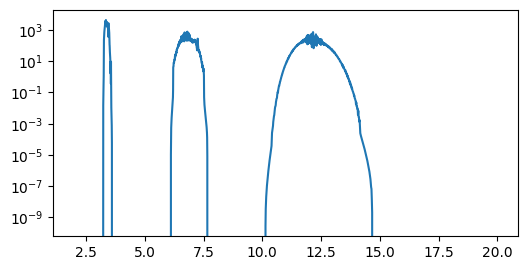

In [13]:
import os
import numpy as np
os.environ['pRT_input_data_path'] = "/home/natalie/.local/lib/python3.8/site-packages/petitRADTRANS/input_data_std/input_data"
from petitRADTRANS import Radtrans
import matplotlib.pyplot as plt

wlen_range=np.array([2,20]) # in microns for pRT
atmosphere_object = Radtrans(line_species=['C2H6'],
                    rayleigh_species = ['H2', 'He'],
                    continuum_opacities = ['H2-H2', 'H2-He'],
                    wlen_bords_micron=wlen_range, 
                    mode='c-k')

T = np.array([300]).reshape(1)
wave_cm, opas = atmosphere_object.get_opa(T)
wave_um = wave_cm*1e4 # microns

fig,ax=plt.subplots(1,1,figsize=(6,3),dpi=100)
spec,=plt.plot(wave_um,opas['C2H6'])
plt.yscale('log')


  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...
Done.



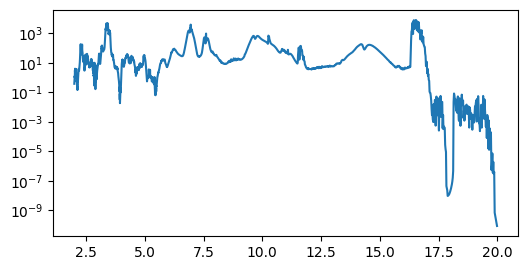

In [ ]:
import os
import numpy as np
os.environ['pRT_input_data_path'] = "/home/natalie/.local/lib/python3.8/site-packages/petitRADTRANS/input_data_std/input_data"
from petitRADTRANS import Radtrans
import matplotlib.pyplot as plt

wlen_range=np.array([2,20]) # in microns for pRT
atmosphere_object = Radtrans(line_species=['DMS'],
                    rayleigh_species = ['H2', 'He'],
                    continuum_opacities = ['H2-H2', 'H2-He'],
                    wlen_bords_micron=wlen_range, 
                    mode='c-k')

T = np.array([300]).reshape(1)
wave_cm, opas = atmosphere_object.get_opa(T)
wave_um = wave_cm*1e4 # microns

fig,ax=plt.subplots(1,1,figsize=(6,3),dpi=100)
spec,=plt.plot(wave_um,opas['DMS'])
plt.yscale('log')
